In [1]:
! pwd

/Users/tjarkmiener/Desktop/ctlearn_workshop/ctlearn_workshop2024/notebooks


In [2]:
! conda list | grep ctapipe
! conda list | grep ctlearn
! conda list | grep dl1-data-handler 
! conda list | grep tensorflow

ctapipe                   0.20.0                   pypi_0    pypi
# packages in environment at /opt/anaconda3/envs/ctlearn:
ctlearn                   0.7.0.post48              dev_0    <develop>
dl1-data-handler          0.10.11.post35            dev_0    <develop>
tensorflow                2.15.1                   pypi_0    pypi
tensorflow-estimator      2.15.0                   pypi_0    pypi
tensorflow-io-gcs-filesystem 0.37.0                   pypi_0    pypi


In [3]:
! du -h ../data/R1DL1_merged/*

1.2G	../data/R1DL1_merged/gamma_theta_16.087_az_108.090_runs1-2.r1.dl1.h5
1.3G	../data/R1DL1_merged/gamma_theta_16.087_az_108.090_runs3-4.r1.dl1.h5
163M	../data/R1DL1_merged/proton_theta_16.087_az_108.090_runs1-2.r1.dl1.h5
147M	../data/R1DL1_merged/proton_theta_16.087_az_108.090_runs3-4.r1.dl1.h5
160M	../data/R1DL1_merged/proton_theta_16.087_az_108.090_runs5-6.r1.dl1.h5
1.3G	../data/R1DL1_merged/test/gamma-diffuse
385M	../data/R1DL1_merged/test/proton
1.7G	../data/R1DL1_merged/test


In [4]:
#! vitables

## Exploring the data files with DL1DH
Besides vitables we can also explore the data with the reading functionality of the DL1DH. This is a cruical part to inspect the previously performed data reduction through ctapipe. With this notebook one can spot corrupted data and ensure that the input provided to CTLearn's CNNs is correct.

In [5]:
#Let's import some plotting libraries for visualization. 
import numpy as np
from dl1_data_handler.reader import DL1DataReaderSTAGE1
import matplotlib.pyplot as plt

### Image reading
The basic functionality of reading images for a telescope operating in monoscopic mode. 

0:{'name': 'image', 'tel_type': 'LST_LST_LSTCam', 'base_name': 'image', 'shape': (110, 110, 1), 'dtype': dtype('float32')}
1:{'name': 'true_energy', 'tel_type': None, 'base_name': 'true_energy', 'shape': (), 'dtype': dtype('float64')}
2:{'name': 'true_alt', 'tel_type': None, 'base_name': 'true_alt', 'shape': (), 'dtype': dtype('float64')}
3:{'name': 'true_az', 'tel_type': None, 'base_name': 'true_az', 'shape': (), 'dtype': dtype('float64')}
true_energy: 0.7573603391647339
true_alt: 73.85827791068957
true_az: 110.80501143333629


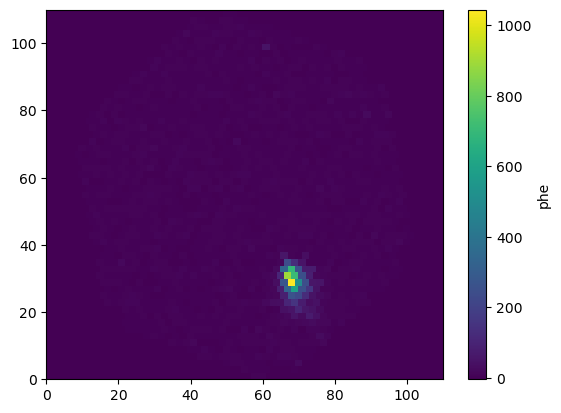

true_energy: 0.7573603391647339
true_alt: 73.85827791068957
true_az: 110.80501143333629


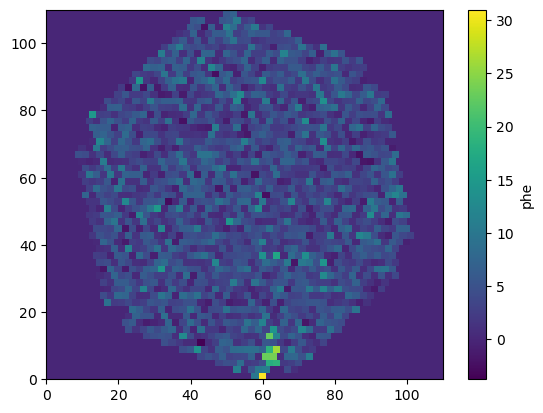

true_energy: 0.7573603391647339
true_alt: 73.85827791068957
true_az: 110.80501143333629


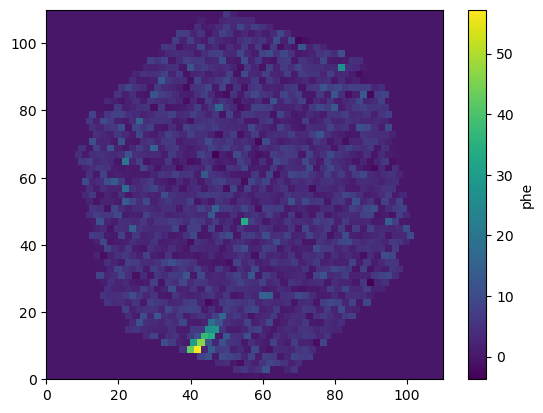

In [6]:
LST1_gammafile = "../data/R1DL1_merged/gamma_theta_16.087_az_108.090_runs1-2.r1.dl1.h5"
LST1_protonfile = "../data/R1DL1_merged/proton_theta_16.087_az_108.090_runs1-3.r1.dl1.h5"

parameter_selection = [{'col_name': "hillas_intensity", 'min_value':50.0}]
image_settings = {'image_channels': ['image']}
mapping_settings = {'mapping_method': {'LSTCam': 'oversampling'}}

event_info = ["true_energy", "true_alt", "true_az"]

mono_reader = DL1DataReaderSTAGE1([LST1_gammafile],
    mode='mono',
    selected_telescope_types=["LST_LST_LSTCam"],
    parameter_selection=parameter_selection,
    image_settings=image_settings,
    mapping_settings=mapping_settings,
    event_info=event_info)

description = mono_reader.example_description
for pos, desc in enumerate(description):
    print(f"{pos}:{desc}")
    
NUM_IMAGES_TO_PLOT = 3
i = 0
while i < NUM_IMAGES_TO_PLOT:
    event = mono_reader[i]
    image = event[0]
    print(f"{description[1]['name']}: {event[1]}")
    print(f"{description[2]['name']}: {event[2]}")
    print(f"{description[3]['name']}: {event[3]}")
    plt.figure()
    plt.pcolor(image[:,:,0],cmap='viridis')
    plt.colorbar(label="phe")
    plt.show()
    plt.close()
    i+=1




### Waveform reading
The basic functionality of reading waveforms for a telescope operating in monoscopic mode.

In [7]:
LST1_gammafile = "../data/R1DL1_merged/gamma_theta_16.087_az_108.090_runs1-2.r1.dl1.h5"
LST1_protonfile = "../data/R1DL1_merged/proton_theta_16.087_az_108.090_runs1-3.r1.dl1.h5"

parameter_selection = [{'col_name': "hillas_intensity", 'min_value':5000.0}]
mapping_settings = {'mapping_method': {'LSTCam': 'image_shifting'}}

waveform_sequence_length = 20

waveform_settings = {'waveform_type': 'cleaned_calibrated', \
                     'waveform_sequence_length': waveform_sequence_length, \
                     'waveform_max_from_simulation': False, \
                     'waveform_format': 'timechannel_last'}



waveform_mono_reader = DL1DataReaderSTAGE1([LST1_protonfile],
    mode='mono',
    selected_telescope_types=["LST_LST_LSTCam"],
    parameter_selection=parameter_selection,
    waveform_settings = waveform_settings,
    mapping_settings=mapping_settings)

event_nr = 0
i = 0
while i < waveform_sequence_length:
    event = waveform_mono_reader[event_nr]
    waveform = event[0]
    plt.figure()
    plt.pcolor(waveform[:,:,i],cmap='viridis')
    plt.colorbar(label="phe")
    plt.show()
    plt.close()
    i+=1


FileNotFoundError: ``/Users/tjarkmiener/Desktop/ctlearn_workshop/ctlearn_workshop2024/data/R1DL1_merged/proton_theta_16.087_az_108.090_runs1-3.r1.dl1.h5`` does not exist

### Stereo reading
The basic functionality of reading images for a telescope system operating in stereoscopic mode.

0:{'name': 'LST_LST_LSTCam_HWtriggers', 'tel_type': 'LST_LST_LSTCam', 'base_name': 'HWtriggers', 'shape': (4,), 'dtype': dtype('int8')}
1:{'name': 'LST_LST_LSTCam_images', 'tel_type': 'LST_LST_LSTCam', 'base_name': 'images', 'shape': (4, 110, 110, 1), 'dtype': dtype('float32')}
2:{'name': 'true_energy', 'tel_type': None, 'base_name': 'true_energy', 'shape': (), 'dtype': dtype('float64')}
3:{'name': 'true_alt', 'tel_type': None, 'base_name': 'true_alt', 'shape': (), 'dtype': dtype('float64')}
4:{'name': 'true_az', 'tel_type': None, 'base_name': 'true_az', 'shape': (), 'dtype': dtype('float64')}
Event nr. 1
Trigger information: [1 1 1 1]
true_energy: 4.51204252243042


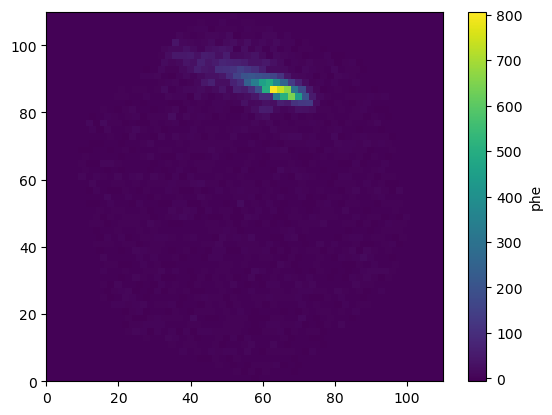

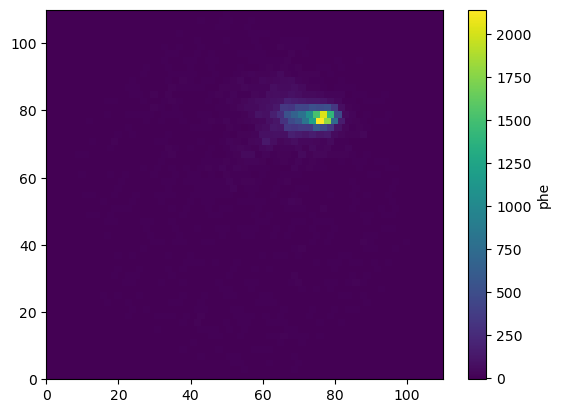

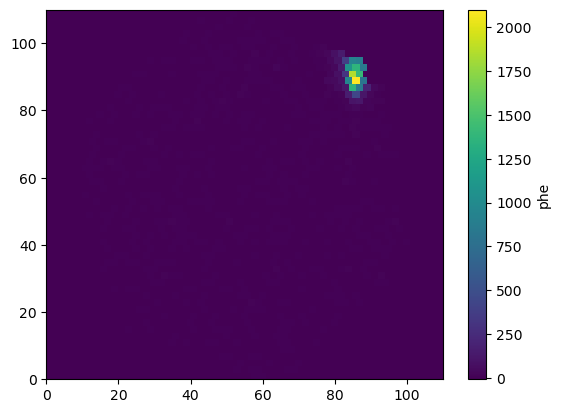

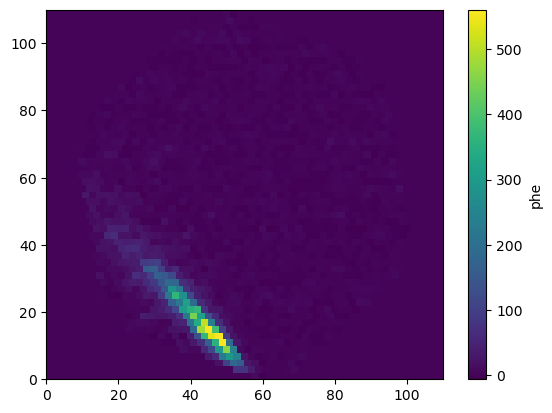

Event nr. 2
Trigger information: [1 1 1 1]
true_energy: 0.864677369594574


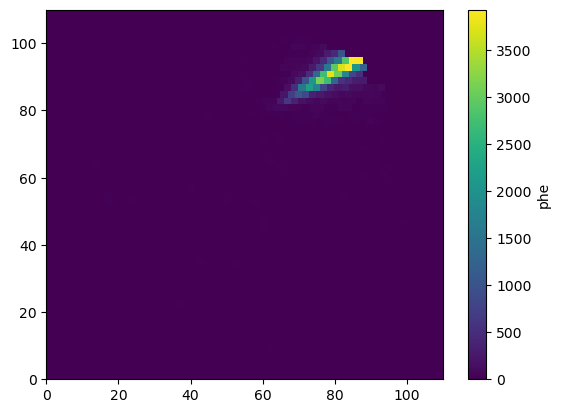

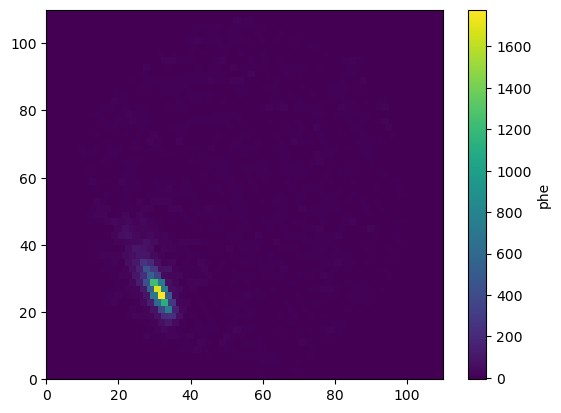

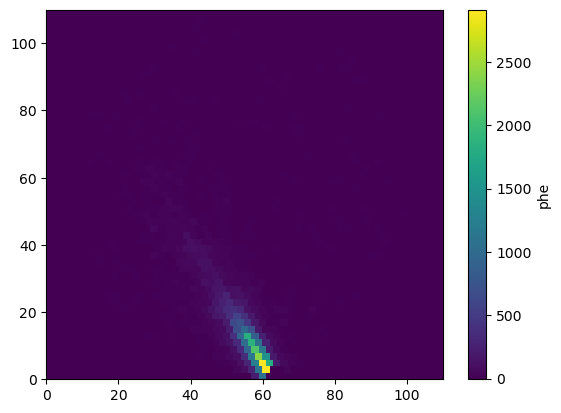

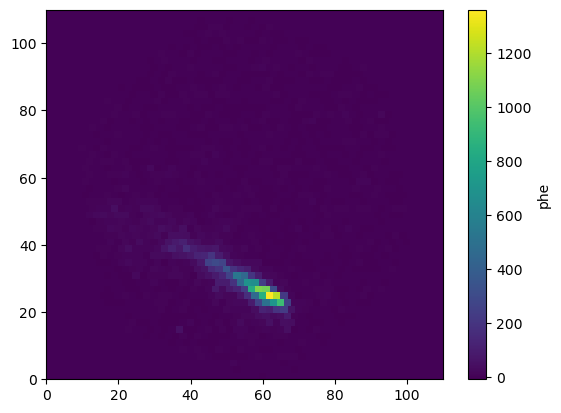

Event nr. 3
Trigger information: [1 1 1 1]
true_energy: 0.049339793622493744


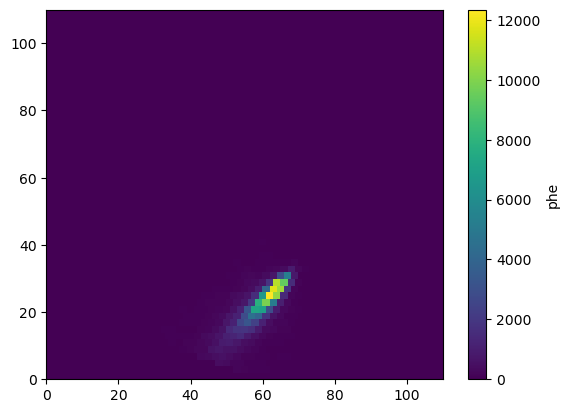

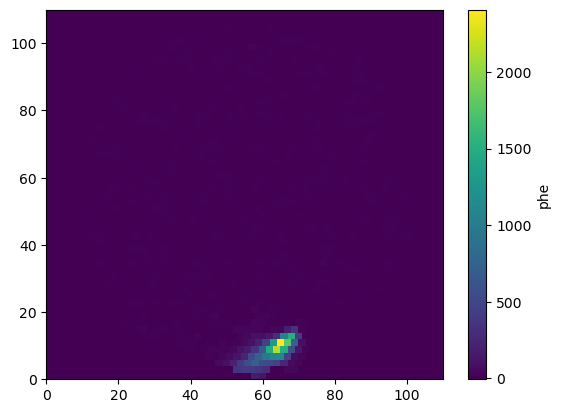

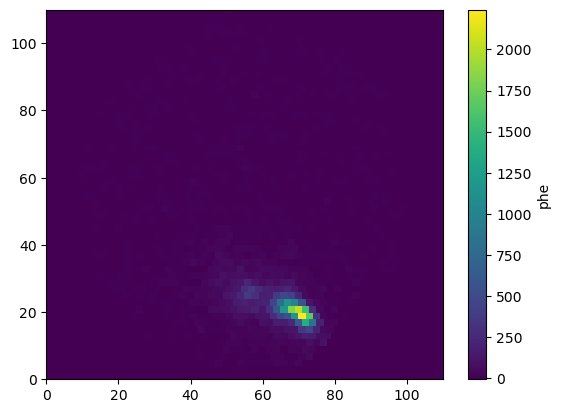

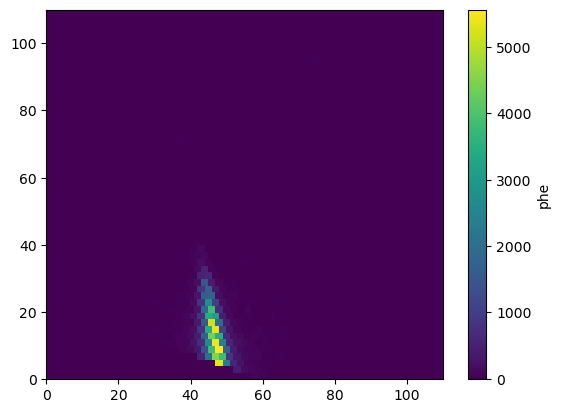

Event nr. 4
Trigger information: [1 1 1 1]
true_energy: 0.05674324557185173


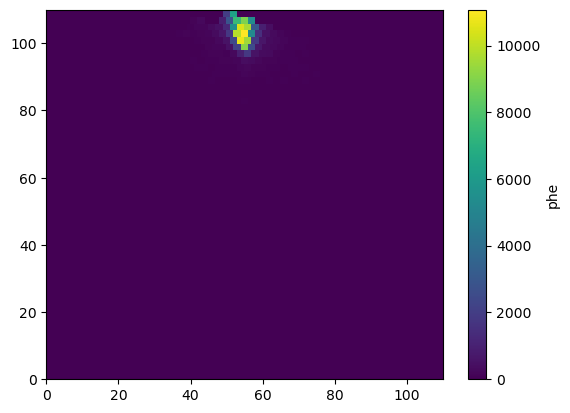

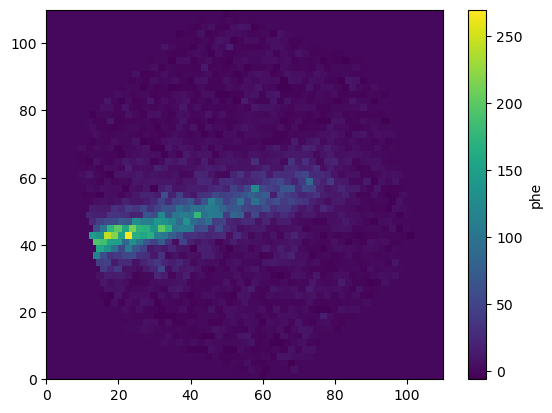

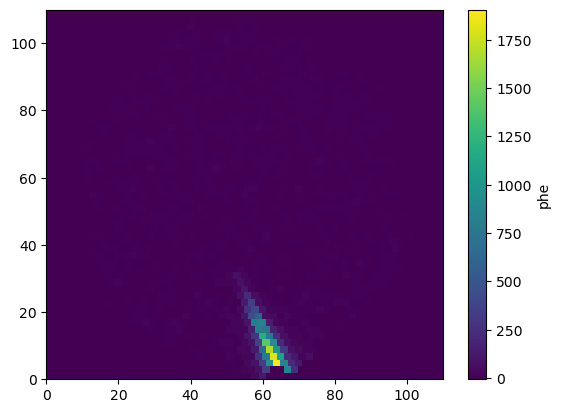

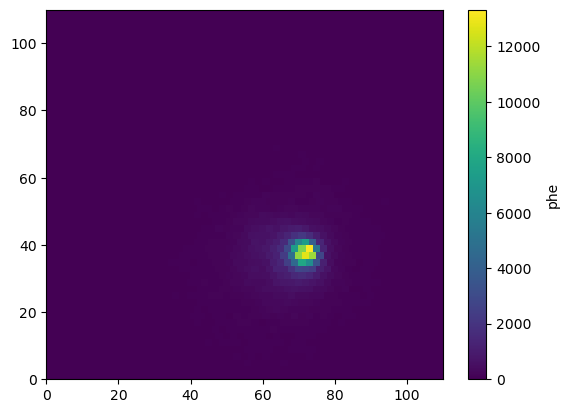

Event nr. 5
Trigger information: [1 1 1 1]
true_energy: 2.1239211559295654


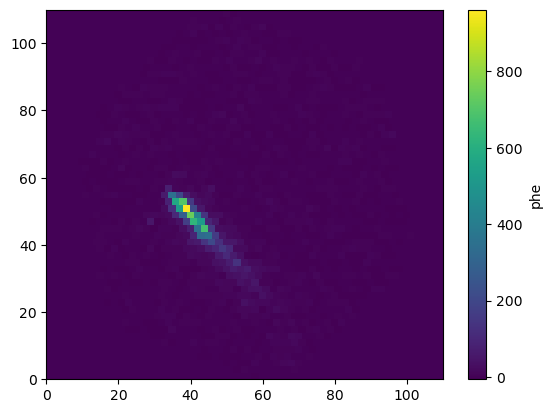

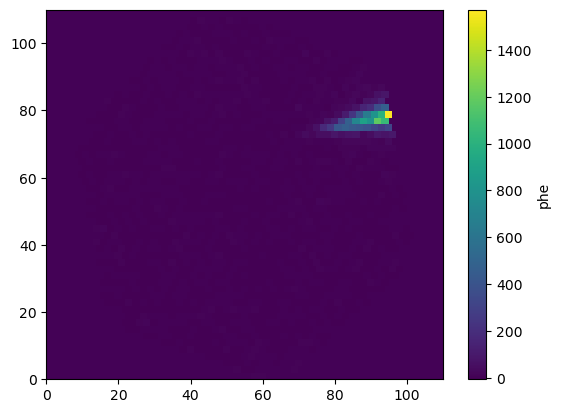

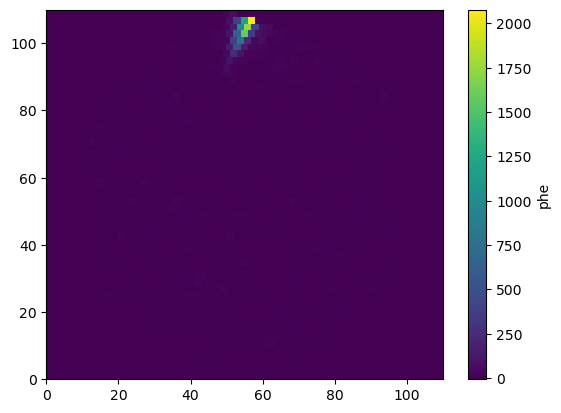

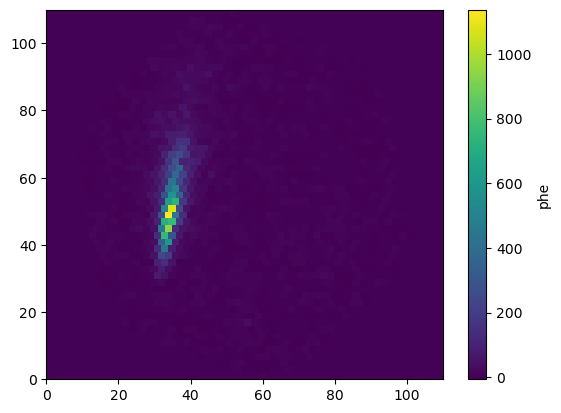

Event nr. 6
Trigger information: [1 1 1 1]
true_energy: 0.18921726942062378


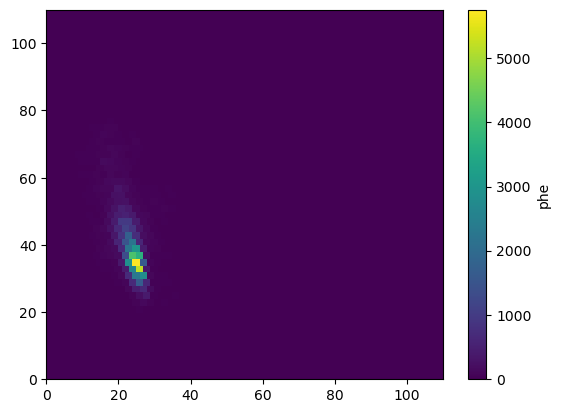

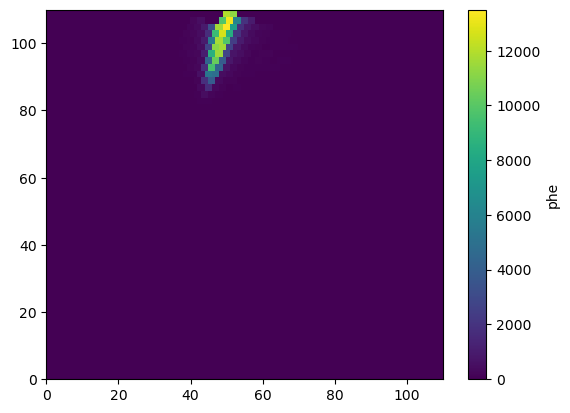

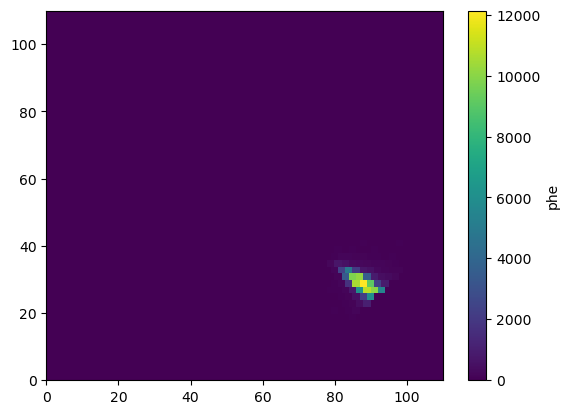

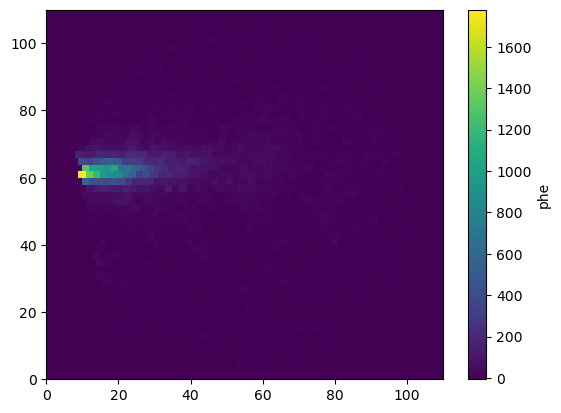

Event nr. 7
Trigger information: [1 1 1 1]
true_energy: 0.3067909777164459


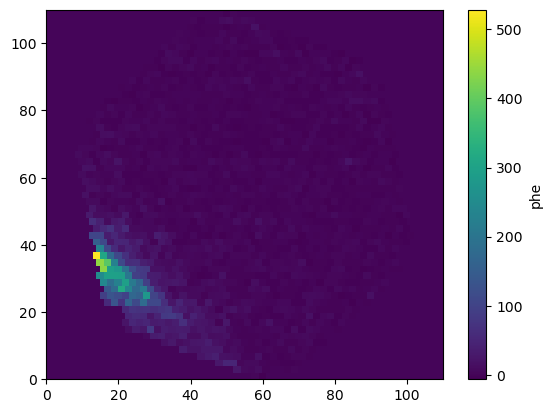

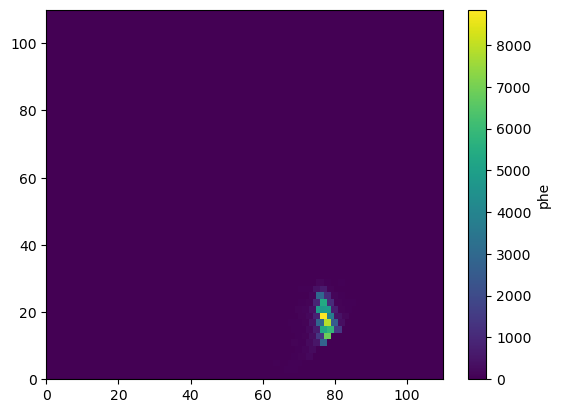

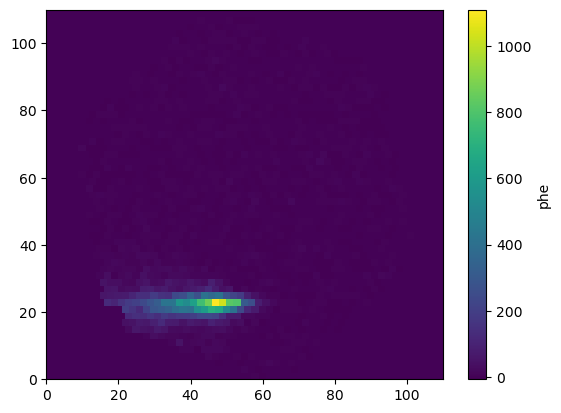

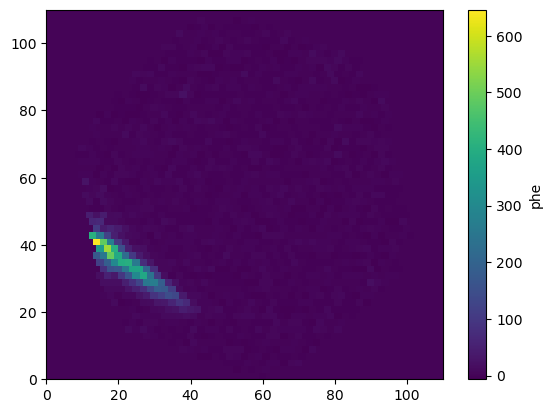

Event nr. 8
Trigger information: [1 1 1 1]
true_energy: 0.527940034866333


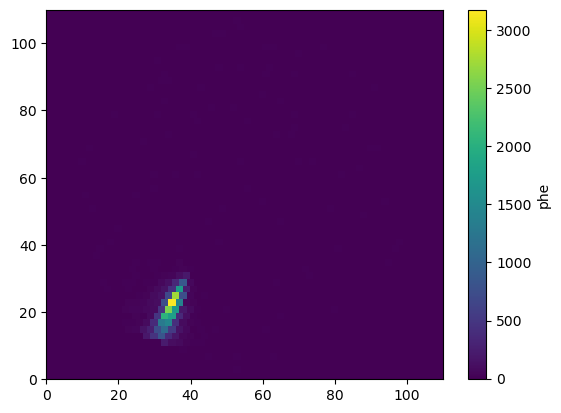

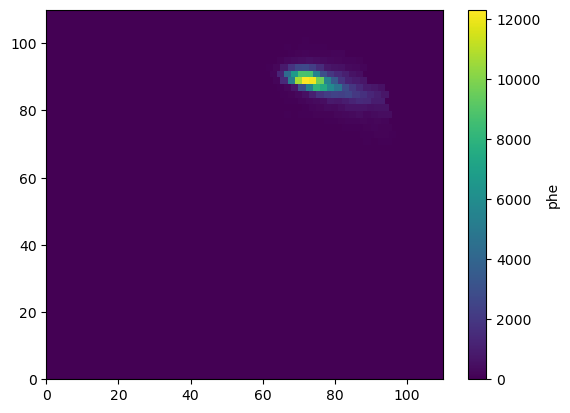

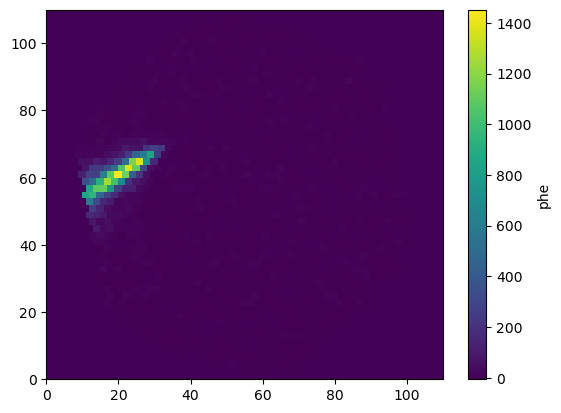

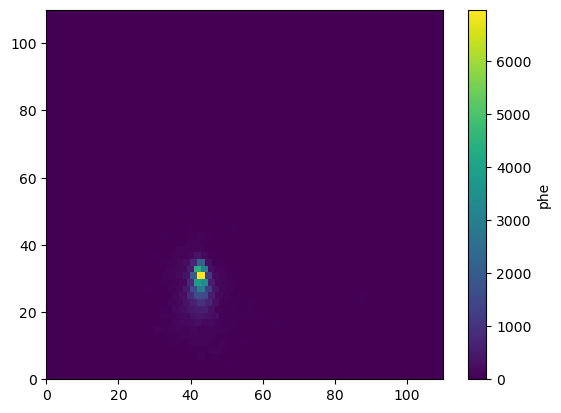

Event nr. 9
Trigger information: [1 1 1 1]
true_energy: 0.09481983631849289


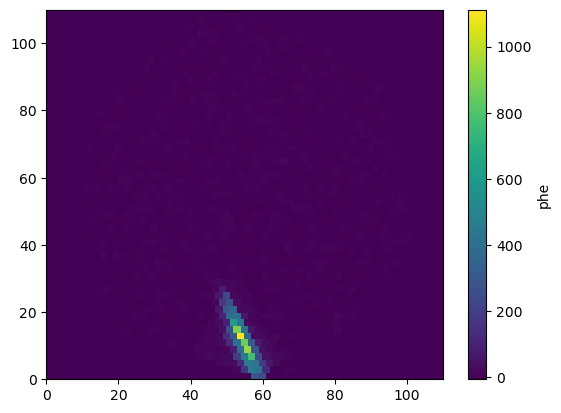

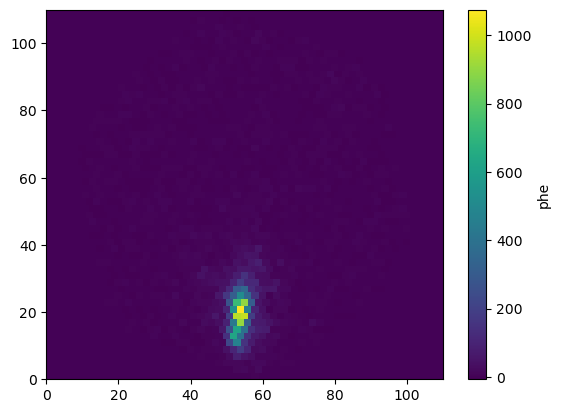

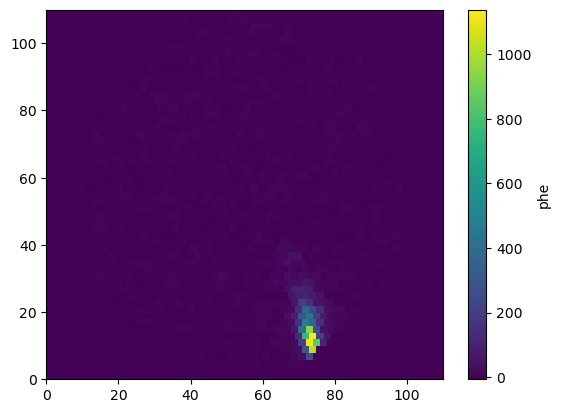

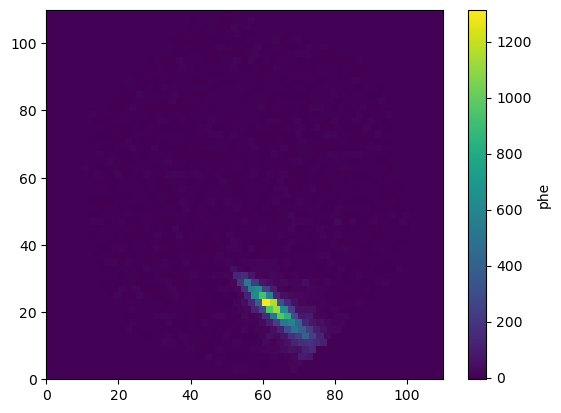

Event nr. 10
Trigger information: [1 1 1 1]
true_energy: 12.50415325164795


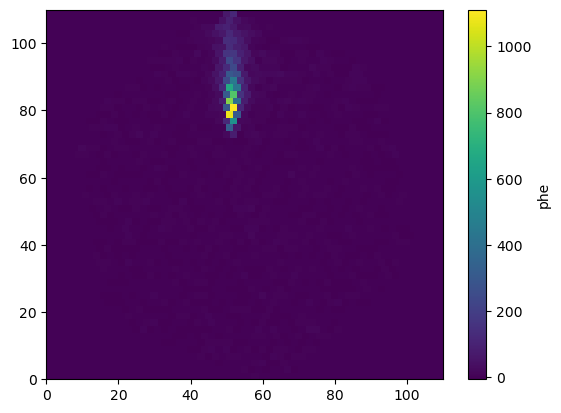

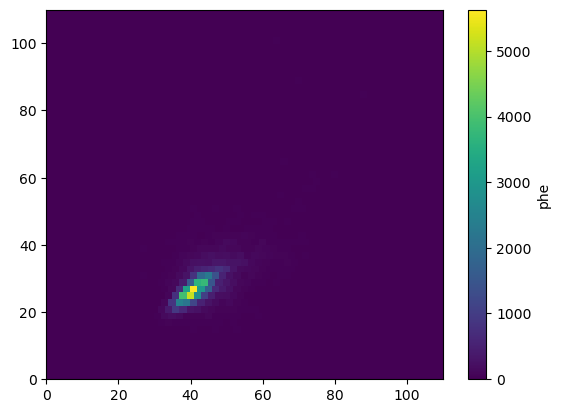

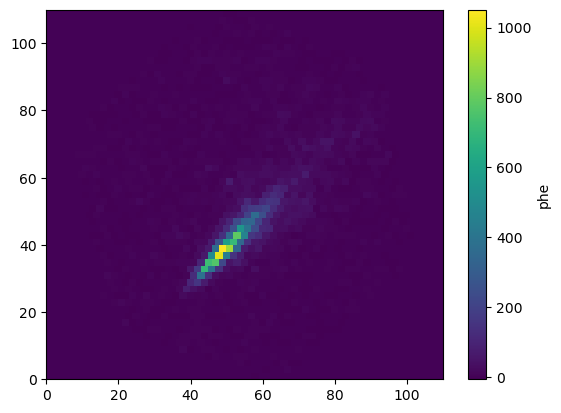

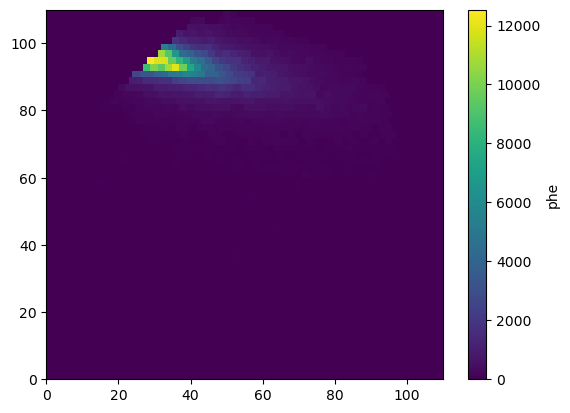

In [9]:
# Stereo reading

ctao_public_gammafile = "../data/DL1_CTAO_public/gamma-diffuse_with_images_01.dl2.h5"

parameter_selection = [{'col_name': "hillas_intensity", 'min_value':5000.0}]
image_settings = {'image_channels': ['image']}
event_info = ["true_energy", "true_alt", "true_az"]

multiplicity_selection = {'LST_LST_LSTCam': 4.0}
#multiplicity_selection = {'MST_MST_NectarCam': 4.0}
tel_type = ["LST_LST_LSTCam"]
#tel_type = ["MST_MST_NectarCam"]
selected_telescope_ids=None
#selected_telescope_ids=[1,2]


stereo_reader = DL1DataReaderSTAGE1([ctao_public_gammafile],
    mode='stereo',
    selected_telescope_types=tel_type,
    selected_telescope_ids=selected_telescope_ids,
    multiplicity_selection=multiplicity_selection,
    parameter_selection=parameter_selection,
    image_settings = image_settings,
    event_info=event_info)

description = stereo_reader.example_description
for pos, desc in enumerate(description):
    print(f"{pos}:{desc}")


NUM_IMAGES_TO_PLOT = 10
i = 0
while i < NUM_IMAGES_TO_PLOT:
    print("Event nr. {}".format(i+1))
    event = stereo_reader[i]
    print(f"Trigger information: {event[0]}")
    print(f"{description[2]['name']}: {event[2]}")
    image = event[1]
    plt.figure()
    plt.pcolor(image[0,:,:,0],cmap='viridis')
    plt.colorbar(label="phe")
    plt.show()
    plt.close()
    plt.pcolor(image[1,:,:,0],cmap='viridis')
    plt.colorbar(label="phe")
    plt.show()
    plt.close()
    plt.pcolor(image[2,:,:,0],cmap='viridis')
    plt.colorbar(label="phe")
    plt.show()
    plt.close()
    plt.pcolor(image[3,:,:,0],cmap='viridis')
    plt.colorbar(label="phe")
    plt.show()
    plt.close()
    i+=1